In [49]:
# install sklearn and pandas
!pip install --user --upgrade pip
!pip install --user sklearn
!pip install --user pandas 
import pickle, sklearn
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree
import numpy as np 
from sklearn.model_selection import train_test_split 


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# Load Dataset

In [50]:
with open("marketing", "rb") as f:
    dataset=pickle.load(f)
Marketing=dataset["Dataset"]


In [51]:
Marketing_X=Marketing[["Income","Year_Birth","Response"]]
Marketing_y=Marketing["Kidhome"]


## Model Averaging

In [94]:


train_x,test_x, train_y, test_y=train_test_split(Marketing,Marketing_y,test_size=0.15,random_state=10)
train_x,validation_x, train_y, validation_y=train_test_split(train_x,train_y,test_size=0.15,random_state=20)

Feature1=["Income","Year_Birth","Response"]
Feature2=["Year_Birth","NumDealsPurchases"]
Feature3=["Year_Birth","NumStorePurchases"]
Feature4=["ID", "NumDealsPurchases"]
Feature5=["Teenhome","MntFruits"]
Feature6=["Year_Birth","NumStorePurchases","ID","NumDealsPurchases"]




In [95]:
## train 5 models with different features
prediction=np.empty((validation_x.shape[0],5))
i=0
for Features in [Feature1,Feature2,Feature3,Feature4,Feature5]:
    ## use train set to train each model
    model=DecisionTreeClassifier(max_depth=6,criterion="entropy")
    model.fit(train_x[Features],train_y)
    prediction[:,i]=model.predict(validation_x[Features])
    i=i+1
    ## use validation set to report the accuracy

import scipy.stats as spst
prediction=spst.mode(prediction,axis=1)[0]
np.mean(prediction.reshape(-1)==validation_y)


0.7773851590106007

In [96]:
Accuracy=np.empty(5)
i=0
 
for Features in [Feature1,Feature2,Feature3,Feature4,Feature5]:
    ## use train set to train each model
    model=DecisionTreeClassifier(max_depth=6,criterion="entropy")
    model.fit(train_x[Features],train_y)
    ## use validation set to report the accuracy
    Accuracy[i]=np.mean(validation_y==model.predict(validation_x[Features]))
    i=i+1
Accuracy


array([0.76678445, 0.65371025, 0.76678445, 0.63250883, 0.71024735])

## Bagging

In [100]:
prediction=np.empty((validation_x.shape[0],100))
i=0
for i in range(100):
    ## use train set to train each model
    model=DecisionTreeClassifier(max_depth=6,criterion="entropy")
    ## bootstrap
    index=np.random.choice(train_x.index,replace=True,size=len(train_x.index))
    model.fit(train_x.loc[index,Feature3],train_y.loc[index])
    prediction[:,i]=model.predict(validation_x[Feature3])
    i=i+1
    ## use validation set to report the accuracy

import scipy.stats as spst
prediction=spst.mode(prediction,axis=1)[0]
np.mean(prediction.reshape(-1)==validation_y)
 


0.7703180212014135

In [101]:
## if we did not do bagging
model=DecisionTreeClassifier(max_depth=6,criterion="entropy")
model.fit(train_x.loc[:,Feature3],train_y)
prediction=model.predict(validation_x[Feature3])
np.mean(prediction.reshape(-1)==validation_y)


0.7667844522968198

## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
## if regression tree 
## choose 
# from sklearn.ensemble import RandomForestRegressor


In [112]:
##train 1000 classifiers. Bootstrap samples and each split consider two random features
model=RandomForestClassifier(n_estimators=1000,max_features=2,bootstrap=True,max_depth=2)

In [113]:
model.fit(train_x.loc[:,Feature3],train_y)
prediction=model.predict(validation_x[Feature3])
np.mean(prediction.reshape(-1)==validation_y)

0.773851590106007

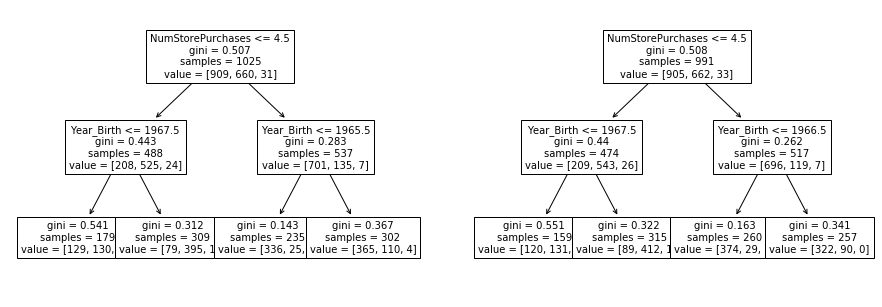

In [114]:
fig,ax=plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
plot_tree(model[0],feature_names=Feature3,fontsize=10,ax=ax[0])
plot_tree(model[1],feature_names=Feature3,fontsize=10,ax=ax[1])
plt.show()